# Try to determine product forecasting

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

Import our data and do some cleanup

In [2]:
data = pd.read_csv('../data/data.csv', parse_dates=['Date'])
data.sort_values(by='Date', inplace=True)
data['Order_Demand'] = data['Order_Demand'].str.strip('()').astype(int)
data = data.dropna()

Lets look at the most ordered product. This might make forecasting easier. (It didn't! It make it harder.)

In [44]:
d = data.groupby('Product_Code').sum()
d.nlargest(5, 'Order_Demand')

,Order_Demand
Product_Code,
Product_1359,472474000
Product_1248,289117000
Product_0083,210651000
Product_1341,169777000
Product_1295,123303000


I originally wanted to use the highest demanded product. However, this made visualization very difficult. 
I picked random numbers until it was easier to see trends.

I'm also using quantile because this data possibly has very large outliers. 99% seems reasonable.

In [86]:
prod = data.loc[data['Product_Code'] == 'Product_0016']
q = prod['Order_Demand'].quantile(0.99)
prod = prod[prod['Order_Demand'] < q]

We'll use FB Prophet to do our forecasting. We need 2 columns with ds and y values.

In [87]:
m = Prophet()
prodP = prod.drop(['Product_Code', 'Warehouse', 'Product_Category'], axis=1)
prodP.rename(columns={'Order_Demand': 'y', 'Date': 'ds'}, inplace=True)
m.fit(prodP);

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Now lets predict 1 year into the future.

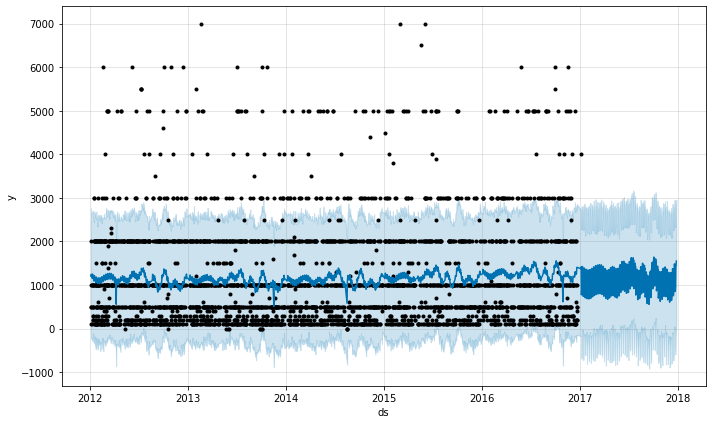

In [88]:
future_prices = m.make_future_dataframe(periods=356)
forecast = m.predict(future_prices)
fig = m.plot(forecast)

Very cluttered. Lets look at forecast components.

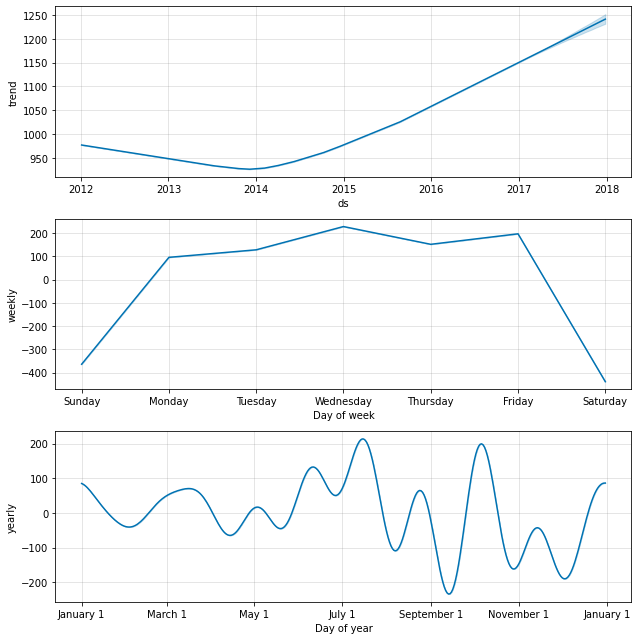

In [89]:
fig2 = m.plot_components(forecast)
plt.show()

It's easy to see yearly and overall trends. Some months in the Fall/Winter you could keep minimal stock.

This would be very beneficial if the product had a shelf life.